In [1]:
from sklearn.metrics import precision_recall_curve

In [2]:
import pandas as pd
import numpy as np

In [3]:
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999)

In [4]:
eval_distill = pd.read_csv("all_distill_roberta_evaluation_scores.csv")
eval_distill['model'] = 'distillroberta'
eval_bioclinicalbert= pd.read_csv("bio_clinical_bert_evaluation_scores.csv")
eval_bioclinicalbert['model'] = 'bioclinicalbert'
eval_biobertdiseasesner= pd.read_csv("biobert_diseases_ner_evaluation_scores.csv")
eval_biobertdiseasesner['model'] = 'biobert_diseases_ner'
eval_biomedical= pd.read_csv("biomedical_ner_all_evaluation_scores.csv")
eval_biomedical['model'] = 'biomedical'
eval_biomedNLP= pd.read_csv("biomedNLP_evaluation_evaluation_scores.csv")
eval_biomedNLP['model'] = 'biomedNLP'

In [5]:
threshold_10=eval_distill[eval_distill.threshold==10]

In [6]:
threshold_10.groupby("threshold")["recall","precision"].mean()

/var/folders/_l/b6xwsf494bjcy6h68bqlx5jh0000gn/T/ipykernel_3727/1971474293.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  threshold_10.groupby("threshold")["recall","precision"].mean()


,recall,precision
threshold,,
10,0.917792,0.997657


<AxesSubplot:xlabel='recall'>

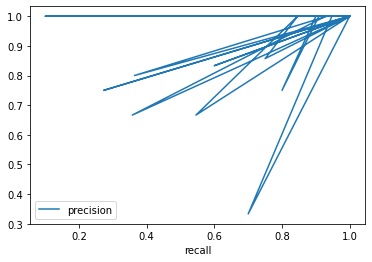

In [7]:
threshold_10.plot(x="recall",y="precision")

In [8]:
distill_PR=eval_distill[["threshold","precision","recall"]].groupby("threshold")["precision","recall"].mean().reset_index()

/var/folders/_l/b6xwsf494bjcy6h68bqlx5jh0000gn/T/ipykernel_3727/3169150950.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  distill_PR=eval_distill[["threshold","precision","recall"]].groupby("threshold")["precision","recall"].mean().reset_index()


<AxesSubplot:xlabel='recall'>

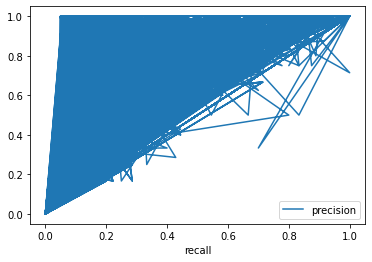

In [9]:
eval_distill.plot(x="recall",y=["precision"])

In [11]:
all_evaluations = eval_distill.append(eval_bioclinicalbert).append(eval_biobertdiseasesner).append(eval_biomedical).append(eval_biomedNLP)
all_evaluations['fdr'] = 1 - (all_evaluations['precision'])

/var/folders/_l/b6xwsf494bjcy6h68bqlx5jh0000gn/T/ipykernel_3727/2939425193.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_evaluations = eval_distill.append(eval_bioclinicalbert).append(eval_biobertdiseasesner).append(eval_biomedical).append(eval_biomedNLP)
/var/folders/_l/b6xwsf494bjcy6h68bqlx5jh0000gn/T/ipykernel_3727/2939425193.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_evaluations = eval_distill.append(eval_bioclinicalbert).append(eval_biobertdiseasesner).append(eval_biomedical).append(eval_biomedNLP)
/var/folders/_l/b6xwsf494bjcy6h68bqlx5jh0000gn/T/ipykernel_3727/2939425193.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_evaluations = eval_distill.append(eval_bioclinicalbert).append(eval_bi

In [12]:
all_evaluations.model.unique()

array(['distillroberta', 'bioclinicalbert', 'biobert_diseases_ner',
       'biomedical', 'biomedNLP'], dtype=object)

In [13]:
import seaborn as sns

In [14]:
#FDR: the lower the better and formula is: FP / (FP+TP) , we know that values below 5% are considered significant
#in FDR , hence by looking at the below numbers we see that at Threshold 20, all the values of the model are below 5%
# that is why we select 20 as the threshold
all_evaluations.groupby(['threshold', 'model']).fdr.mean()

threshold  model               
10         biobert_diseases_ner    0.012150
           bioclinicalbert         0.026313
           biomedNLP               0.006092
           biomedical              0.003051
           distillroberta          0.002343
20         biobert_diseases_ner    0.021600
           bioclinicalbert         0.034552
           biomedNLP               0.019757
           biomedical              0.017999
           distillroberta          0.016538
30         biobert_diseases_ner    0.060250
           bioclinicalbert         0.061333
           biomedNLP               0.061169
           biomedical              0.061292
           distillroberta          0.058129
40         biobert_diseases_ner    0.109883
           bioclinicalbert         0.097887
           biomedNLP               0.118499
           biomedical              0.101168
           distillroberta          0.085169
50         biobert_diseases_ner    0.317400
           bioclinicalbert         0.235045


In [46]:
all_evaluations.groupby(['threshold', 'model']).recall.mean().head(20)

threshold  model               
10         biobert_diseases_ner    0.924193
           bioclinicalbert         0.930667
           biomedNLP               0.929483
           biomedical              0.917492
           distillroberta          0.917792
20         biobert_diseases_ner    0.889244
           bioclinicalbert         0.898551
           biomedNLP               0.891869
           biomedical              0.877253
           distillroberta          0.878618
30         biobert_diseases_ner    0.815957
           bioclinicalbert         0.873800
           biomedNLP               0.869008
           biomedical              0.786477
           distillroberta          0.803384
40         biobert_diseases_ner    0.607497
           bioclinicalbert         0.737739
           biomedNLP               0.753844
           biomedical              0.518420
           distillroberta          0.563161
Name: recall, dtype: float64

In [47]:
all_evaluations.groupby(['threshold', 'model']).precision.mean().head(20)

threshold  model               
10         biobert_diseases_ner    0.987850
           bioclinicalbert         0.973687
           biomedNLP               0.993908
           biomedical              0.996949
           distillroberta          0.997657
20         biobert_diseases_ner    0.978400
           bioclinicalbert         0.965448
           biomedNLP               0.980243
           biomedical              0.982001
           distillroberta          0.983462
30         biobert_diseases_ner    0.939750
           bioclinicalbert         0.938667
           biomedNLP               0.938831
           biomedical              0.938708
           distillroberta          0.941871
40         biobert_diseases_ner    0.890117
           bioclinicalbert         0.902113
           biomedNLP               0.881501
           biomedical              0.898832
           distillroberta          0.914831
Name: precision, dtype: float64

In [48]:
all_evaluations.groupby(['threshold', 'model']).f1_score.mean().head(20)
#at threshold 20 the top 3 models are: biomedNLP, distilroberta, and bioclinicalbert

threshold  model               
10         biobert_diseases_ner    0.952744
           bioclinicalbert         0.949658
           biomedNLP               0.958683
           biomedical              0.951360
           distillroberta          0.951955
20         biobert_diseases_ner    0.924743
           bioclinicalbert         0.924871
           biomedNLP               0.929368
           biomedical              0.921946
           distillroberta          0.925084
30         biobert_diseases_ner    0.916599
           bioclinicalbert         0.906479
           biomedNLP               0.940883
           biomedical              0.898018
           distillroberta          0.904797
40         biobert_diseases_ner    0.752526
           bioclinicalbert         0.807290
           biomedNLP               0.848112
           biomedical              0.677902
           distillroberta          0.715275
Name: f1_score, dtype: float64

In [16]:
eval_distill[eval_distill['threshold'] == 40].f1_score.mean()

0.7152752109495091

In [17]:
eval_bioclinicalbert[eval_bioclinicalbert['threshold'] == 40].f1_score.mean() #2nd

0.8072903319547785

In [18]:
eval_biobertdiseasesner[eval_biobertdiseasesner['threshold'] == 40].f1_score.mean() #3rd

0.7525263757693401

In [19]:
eval_biomedical[eval_biomedical['threshold'] == 40].f1_score.mean()

0.6779018801986599

In [20]:
eval_biomedNLP[eval_biomedNLP['threshold'] == 40].f1_score.mean() #1st

0.8481124551086856